In [1]:
print(5+5)

10


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from darts import TimeSeries
from darts.models import RNNModel


The StatsForecast module could not be imported. To enable support for the AutoARIMA, AutoETS and Croston models, please consider installing it.
The `XGBoost` module could not be imported. To enable XGBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `XGBoost` module could not be imported. To enable XGBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


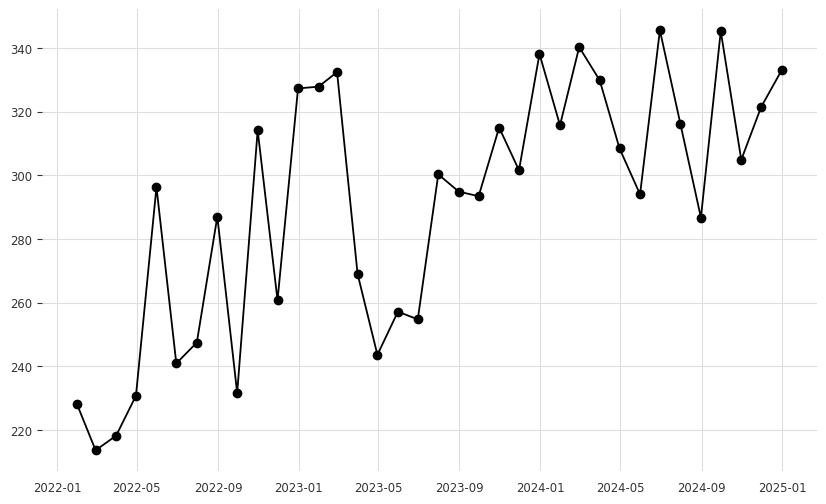

In [36]:
np.random.seed(52)
months = pd.date_range(start = '2022-01-01',periods=36,freq = 'ME')
sales = np.random.randint(200,300,size=36) + np.linspace(0,90,36)
sales_data = pd.DataFrame({'Month' : months , 'Sales' : sales})
sales_data.set_index('Month', inplace=True)
plt.figure(figsize=(10,6))
plt.plot(sales_data.index, sales_data['Sales'], label = 'Original Sales DATA', marker = 'o')


c:\Users\Lenovo\OneDrive\Desktop\GenAI\VoyagersRegionalGenAI\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Lenovo\OneDrive\Desktop\GenAI\VoyagersRegionalGenAI\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Lenovo\OneDrive\Desktop\GenAI\VoyagersRegionalGenAI\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


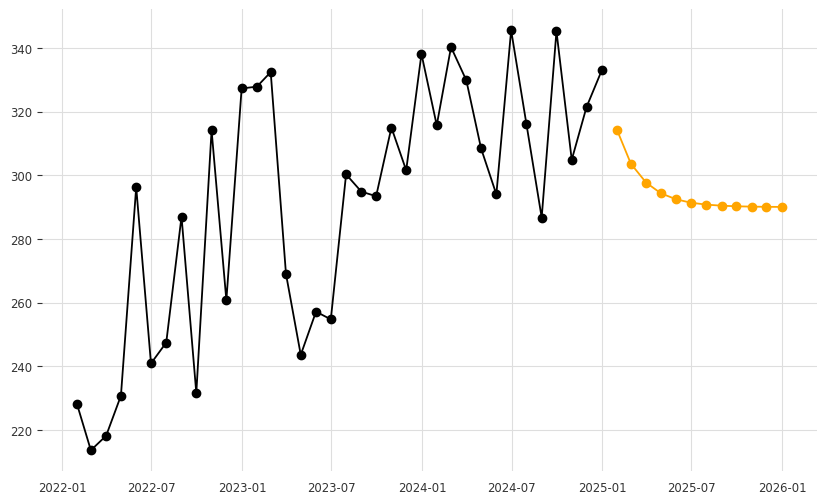

In [37]:
model = ARIMA(sales_data['Sales'], order=(1,0,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

future_months = pd.date_range(start = '2025-01-01',periods=12,freq = 'ME')
plt.figure(figsize=(10,6))
plt.plot(sales_data.index, sales_data['Sales'], label = 'Original Sales DATA', marker = 'o')
plt.plot(future_months, forecast, label = 'Forecasted Sales of ARIMA', marker = 'o', color = 'orange')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.8 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.011     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
c:\Users\Lenovo\OneDrive\Desktop\GenAI\VoyagersRegionalGenAI\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarn

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 62.24it/s, train_loss=7.16e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 55.01it/s, train_loss=7.16e+4]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 98.05it/s] 


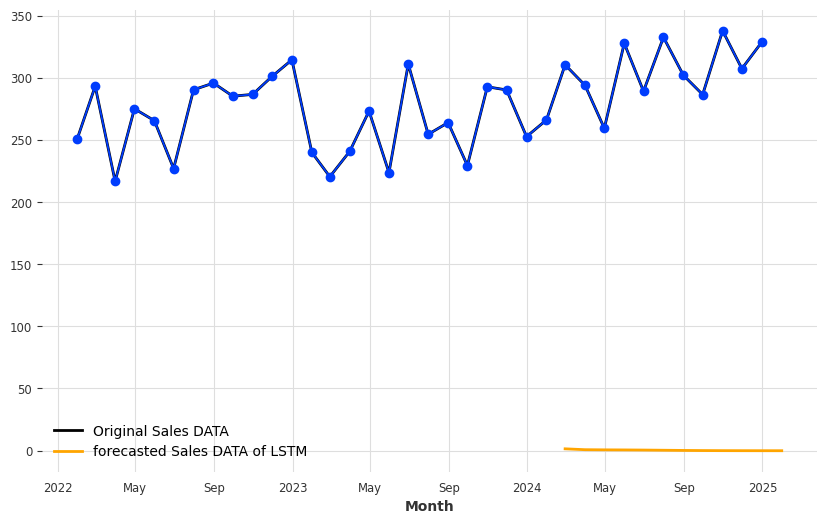

In [60]:
np.random.seed(42)
months = pd.date_range(start = '2022-01-01',periods=36,freq = 'ME')
sales = np.random.randint(200,300,size=36) + np.linspace(0,50,36)

sales_data = pd.DataFrame({'Month' : months , 'Sales' : sales})
sales_data.set_index('Month', inplace=True)
series = TimeSeries.from_dataframe(sales_data)

train, test = series.split_after(pd.Timestamp('2024-02-01'))

model = RNNModel(model = "LSTM", input_chunk_length = 12 )
model.fit(train)

forecast = model.predict(n=12)

plt.figure(figsize=(10,6))
series.plot(label = 'Original Sales DATA')
forecast.plot(label = 'forecasted Sales DATA of LSTM', color = 'orange')
plt.plot(sales_data.index, sales_data['Sales'], label = 'Original Sales DATA', marker = 'o')
